#### Problem Statement


The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

#### Data

Our overall collection of tweets was split in the ratio of 65:35 into training and testing data. Out of the testing data, 30% is public and the rest is private.

 

#### Data Files
 

* train.csv - For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

* test_tweets.csv - The test data file contains only tweet ids and the tweet text with each tweet in a new line.
 

#### Description of the datasets:

* Train Dataset :- Number of tweets = 31962

* Test Dataset :- Number of tweets = 17197

In [8]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
import re

In [2]:
def clean_str(string):
    
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [9]:
train['cleaned'] = train['tweet'].apply(lambda x: clean_str(x))

In [10]:
train.head()

,id,label,tweet,cleaned
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i ca use caus...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [11]:
test['cleaned'] = test['tweet'].apply(lambda x: clean_str(x))

In [12]:
test.head()

,id,tweet,cleaned
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,user white supremacists want everyone to see t...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne ! ! altwaystoheal ...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday to my amazing hilarious nephew eli ahmi...


#### Apply Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#function to implement lemmatization
def lemma(string):
    
    words = []
    tokens = nltk.word_tokenize(string)
    for word in tokens:
        #pint(word)
        words.append(lemmatizer.lemmatize(word))
        
    text = " ".join(words)
    return text

In [14]:
train['Lemma'] = train['cleaned'].apply(lambda x: lemma(x))
test['Lemma'] = test['cleaned'].apply(lambda x: lemma(x))

In [15]:
train.head()

,id,label,tweet,cleaned,Lemma
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...,user when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i ca use caus...,user user thanks for lyft credit i ca use caus...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur ...,model i love u take with u all the time in ur ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation


In [16]:
test.head()

,id,tweet,cleaned,Lemma
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,user white supremacists want everyone to see t...,user white supremacist want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne ! ! altwaystoheal ...,safe way to heal your acne ! ! altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday to my amazing hilarious nephew eli ahmi...,bihday to my amazing hilarious nephew eli ahmi...


In [27]:
def remove_stop_words(text):    
    words = []
    tokens = nltk.word_tokenize(text)
    #print(tokens)
    for word in tokens:
        #pint(word)
        if word not in stopwords.words('english'):
            words.append(word)
        
    text = " ".join(words)
    return text

In [28]:
remove_stop_words('safe ways to heal your acne')

'safe ways heal acne'

In [29]:
train['Lemma'] = train['Lemma'].apply(lambda x: remove_stop_words(x))
test['Lemma'] = test['Lemma'].apply(lambda x: remove_stop_words(x))

In [30]:
train.head()

,id,label,tweet,cleaned,Lemma
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i ca use caus...,user user thanks lyft credit ca use cause offe...
2,3,0,bihday your majesty,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur ...,model love u take u time ur ! ! !
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society motivation


In [31]:
test.head()

,id,tweet,cleaned,Lemma
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,user white supremacists want everyone to see t...,user white supremacist want everyone see new b...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne ! ! altwaystoheal ...,safe way heal acne ! ! altwaystoheal healthy h...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday to my amazing hilarious nephew eli ahmi...,bihday amazing hilarious nephew eli ahmir ! un...


#### Handling imbalanced classes

In [32]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

If we count the number of tweets for each label we can see that there are a significantly larger number of tweets labelled as 0. In fact only 7% are classified as sexist/racist. This is problematic as if we provide an algorithm with this data there is a high chance that it will default to predicting all labels as 0.

There are a number of methods you can use to handle this. One approach is to use either upsampling or downsampling. In the case of upsampling we use a function that repeatedly takes samples, with replacement, from the minority class until the class is the same size as the majority. With replacement means that the same sample can be used multiple times.

#### Upsampling

In [33]:
from sklearn.utils import resample

train_majority = train[train['label'] == 0]
train_minority = train[train['label'] == 1]
print(train_majority.shape,train_minority.shape)

#
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

(29720, 5) (2242, 5)


1    29720
0    29720
Name: label, dtype: int64

#### Downsampling


In [34]:
train_majority_downsampled = resample(train_majority, 
                                 replace=True,  
                                 n_samples=len(train_minority),   
                                 random_state=123)
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
train_downsampled['label'].value_counts()

1    2242
0    2242
Name: label, dtype: int64

#### Used Upsampling as it yields better results

#### TfidfTransformer

Machines are not capable of reading text in the same way as humans do. In order for a machine learning algorithm to determine patterns in text it must first be converted into a numeric structure. One of the most common techniques for this is called Term Frequency Inverse Document Frequency.

In any text document there will be a number of words that appear very frequently such as I, we, and get. If we were to build a model without weighting these words they would overshadow less frequent words during training. By weighting these high frequency words we can assign, for example, more importance to less frequent but perhaps more useful words.

#### Train Test Split - Training data + Vlidation data 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['Lemma'],                                    
                                                    train_upsampled['label'],random_state = 0)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44580,)
(14860,)
(44580,)
(14860,)


#### Training the data

For simplicity and reproducibility I am going to use a sci-kit learn pipeline with a SGDClassifier. The below code creates a pipeline object that when used will apply each step to the data.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),
])

In [78]:
from sklearn import ensemble
pipeline_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', ensemble.RandomForestClassifier()),
])

D:\Users\Plaban_Nayak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [79]:
model = pipeline_rf.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [80]:
print("F1 Score for training data :",f1_score(y_test, y_predict)*100,'%')

F1 Score for training data : 98.43687374749499 %


In [50]:
train_upsampled.head()

,id,label,tweet,cleaned,Lemma
19492,19493,1,@user you might be a libtard if... #libtard #...,user you might be a libtard if libtard sjw lib...,user might libtard libtard sjw liberal politics
16151,16152,1,@user @user is good place to sta learning abt ...,user user is good place to sta learning abt ho...,user user good place sta learning abt one pers...
25144,25145,1,@user #allahsoil bernanke bailed out wall stre...,user allahsoil bernanke bailed out wall street...,user allahsoil bernanke bailed wall street dum...
30902,30903,1,@user i am just waiting for somebody other tha...,user i am just waiting for somebody other than...,user waiting somebody call see anybody
16522,16523,1,why are white people #expats when the rest of ...,why are white people expats when the rest of u...,white people expat rest u immigrant socialclas...


In [56]:
test.head()

,id,tweet,cleaned,Lemma
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,user white supremacists want everyone to see t...,user white supremacist want everyone see new b...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne ! ! altwaystoheal ...,safe way heal acne ! ! altwaystoheal healthy h...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday to my amazing hilarious nephew eli ahmi...,bihday amazing hilarious nephew eli ahmir ! un...


In [53]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)

D:\Users\Plaban_Nayak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [62]:
from sklearn.metrics import f1_score
print("F1 Score for training data :",f1_score(y_test, y_predict)*100,'%')

F1 Score for training data : 96.71254844313778 %


In [55]:
y_predict.shape

(14860,)

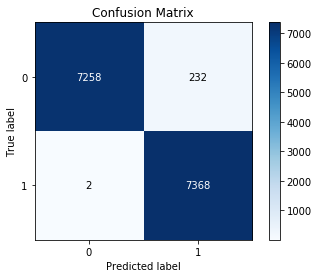

In [86]:
import scikitplot
%matplotlib inline
scikitplot.metrics.plot_confusion_matrix(y_test, y_predict)

In [81]:
test_labels = predict = model.predict(test["Lemma"])

In [82]:
test_labels.shape

(17197,)

In [83]:
label_submission = pd.DataFrame({'id':test['id'].values,'label':test_labels})

In [84]:
label_submission.shape

(17197, 2)

In [85]:
label_submission.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [87]:
#export the predicted labels for test data into acsv file
label_submission.to_csv("labels.csv",index=False)

In [ ]:
#### verifying if the tweet for label 1 predicted in the train dataset has any racist or sexist 

In [72]:
test["label"] = test_labels

In [76]:
test[test["label"]==1].head(3)

,id,tweet,cleaned,Lemma,label
19,31982,thought factory: bbc neutrality on right wing ...,thought factory bbc neutrality on right wing f...,thought factory bbc neutrality right wing fasc...,1
26,31989,chick gets fucked hottest naked lady,chick gets fucked hottest naked lady,chick get fucked hottest naked lady,1
30,31993,i'll #never be #120 #again i'm #i'm a #thick...,i never be again im im a thick women blacktina,never im im thick woman blacktina,1
